# Image Caption Generation

## Whenever an image appears in front of us, our brain can annotate or label it. But what about computers? How can a machine process and label an image with a highly relevant and accurate caption? It seemed quite impossible a few years back. Still, with the enhancement of [Computer Vision](https://www.analyticsvidhya.com/blog/2021/06/everything-happening-in-computer-vision-that-you-should-know/) and [Deep learning](https://www.analyticsvidhya.com/blog/2021/12/a-guide-on-deep-learning-from-basics-to-advanced-concepts/) algorithms, the availability of relevant datasets, and AI models, it becomes easier to build a relevant caption generator for an image. Even Caption generation is growing worldwide, and many data annotation firms are earning billions. In this guide, we will build one such annotation tool capable of generating relevant captions for the image with the help of datasets. Basic knowledge of two Deep learning techniques, including [LSTM](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-long-short-term-memory-lstm/) and [CNN](https://www.analyticsvidhya.com/blog/2021/07/convolution-neural-network-better-understanding/), is required.

## Table of contents :
   
● What is Image Caption Generator?

● What is CNN?

● What is LSTM?

● Dataset for Image Caption Generator :

      1- Pre-requisites
      2- Building the Image Caption Generator

● Import all the Required Packages

● Perform Data Cleaning

● Extract the Feature Vector

● Loading dataset for model training

● Tokenizing the Vocabulary

● Create a Data generator

● Define the CNN-RNN model

● Training the Image Caption Generator model

● Testing the Image Caption Generator model

● End Note

● Frequently Asked Questions


## What is Image Caption Generator?
Image caption generator is a process of recognizing the context of an image and annotating it with relevant captions using deep learning and computer vision. It includes labeling an image with English keywords with the help of datasets provided during model training. The imagenet dataset trains the CNN model called Xception. Xception is responsible for image feature extraction. These extracted features will be fed to the LSTM model, which generates the image caption.

![image.png](https://i.stack.imgur.com/XygNZ.png)

## What is CNN?
CNN is a subfield of Deep learning and specialized deep neural networks used to recognize and classify images. It processes the data represented as 2D matrix-like images. CNN can deal with scaled, translated, and rotated imagery. It analyzes the visual imagery by scanning them from left to right and top to bottom and extracting relevant features. Finally, it combines all the parts for image classification.

## What is LSTM?
Being a type of RNN (recurrent neural network), LSTM (Long short-term memory) is capable of working with sequence prediction problems. It is mostly used for the next word prediction purposes, as in Google search our system is showing the next word based on the previous text. Throughout the processing of inputs, LSTM is used to carry out the relevant information and to discard non-relevant information.

● CNN – To extract features from the image. A pre-trained model called Xception is used for this.

● LSTM – To generate a description from the extracted information of the image.

## Dataset for Image Caption Generator
The Flickr_8K dataset represents the model training of image caption generators. The dataset is downloaded directly from the below links. The downloading process takes some time due to the dataset’s large size(1GB). In the image below, you can check all the files in the Flickr_8k_text folder. The most important file is Flickr 8k.token, which stores all the image names with captions. 8091 images are stored inside the Flicker8k_Dataset folder and the text files with captions of images are stored in the Flickr_8k_text folder.

● [Flicker8k_Dataset](https://www.kaggle.com/datasets/adityajn105/flickr8k/download?datasetVersionNumber=1)


# Pre-requisites
We will use Jupyter notebooks to run our caption generator, A good understanding of Python, Deep learning, and NLP is required for the implementation. If you’re not familiar with these techniques. Please refer to the pre_requisites below first.

● [Python](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/)

● [DeepLearning](https://www.analyticsvidhya.com/blog/2021/05/a-comprehensive-tutorial-on-deep-learning-part-1/)

● [NLP](https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/)

# Install below libraries, to begin with, the project:

pip install TensorFlow

pip install Keras

pip install pillow

pip install NumPy

pip install tqdm

pip install jupyterlab

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/flicker/

/content/drive/MyDrive/flicker


In [3]:
!unzip Flicker8k_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Images/2844846111_8c1cbfc75d.jpg  
  inflating: Images/2844963839_ff09cdb81f.jpg  
  inflating: Images/2845246160_d0d1bbd6f0.jpg  
  inflating: Images/2845691057_d4ab89d889.jpg  
  inflating: Images/2845845721_d0bc113ff7.jpg  
  inflating: Images/2846037553_1a1de50709.jpg  
  inflating: Images/2846785268_904c5fcf9f.jpg  
  inflating: Images/2846843520_b0e6211478.jpg  
  inflating: Images/2847514745_9a35493023.jpg  
  inflating: Images/2847615962_c330bded6e.jpg  
  inflating: Images/2847859796_4d9cb0d31f.jpg  
  inflating: Images/2848266893_9693c66275.jpg  
  inflating: Images/2848571082_26454cb981.jpg  
  inflating: Images/2848895544_6d06210e9d.jpg  
  inflating: Images/2848977044_446a31d86e.jpg  
  inflating: Images/2849194983_2968c72832.jpg  
  inflating: Images/2850719435_221f15e951.jpg  
  inflating: Images/2851198725_37b6027625.jpg  
  inflating: Images/2851304910_b5721199bc.jpg  
  inflating: Images/2851931813_eaf8ed

# Import Required libraries

In [ ]:
import numpy as np      # Provides support for efficient numerical operations.
from PIL import Image   # Handle image processing tasks.
import os               # Allows interaction with the operating system by providing functions for file/folder manipulation.
import string           # Provides a set of useful constants and classes related to strings.
import pickle           # Store NumPy features
from pickle import dump, load   # Enables saving/loading data structures like models or tokenizers.
from keras.applications.xception import Xception  # Which is a pre-trained CNN, along with preprocessing functions specific to Xception.
from keras.applications.xception import preprocess_input
from keras.preprocessing import image  # For loading imgs and img processing
from keras.utils import load_img
from keras.utils import img_to_array   # Applying image transformations
from keras.preprocessing.text import Tokenizer  # For text preprocessing/tokenization
from keras.utils import pad_sequences    # Importing utility functions related to sequence padding, one-hot encoding
from keras.utils import to_categorical, plot_model   #          of labels, and embedding layer in Keras.
from keras.layers import add          # Function for merging layers.
from keras.models import Model, load_model      # Creating/loading models.
from keras.layers import Input, Dense, LSTM, Embedding, Dropout   # Building the neural network model.
from tqdm import tqdm          # Provides a progress bar visualization during iterations.
from nltk.translate.bleu_score import corpus_bleu     # calculate the BLEU score for a corpus of multiple sentences rather than individual sentences
import matplotlib.pyplot as plt

➔ NumPy : Provides support for efficient numerical operations

➔ PIL : Handle image processing tasks

➔ os : Allows interaction with the operating system by providing functions for file/folder manipulation

➔ pickle : used to store numpy features extracted

➔ keras :  provide a user-friendly and intuitive interface for building, training, evaluating, and deploying deep learning models

➔ Tokenizer : used for loading the text as convert them into a token

➔ tqdm : Progress bar decorator for iterators

➔ Xception : For feature extraction from the image data

# Loading The Data

In [4]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/flicker/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/flicker/Images/2844747252_64567cf14a.jpg
/content/drive/MyDrive/flicker/Images/2844846111_8c1cbfc75d.jpg
/content/drive/MyDrive/flicker/Images/2844963839_ff09cdb81f.jpg
/content/drive/MyDrive/flicker/Images/2845246160_d0d1bbd6f0.jpg
/content/drive/MyDrive/flicker/Images/2845691057_d4ab89d889.jpg
/content/drive/MyDrive/flicker/Images/2845845721_d0bc113ff7.jpg
/content/drive/MyDrive/flicker/Images/2846037553_1a1de50709.jpg
/content/drive/MyDrive/flicker/Images/2846785268_904c5fcf9f.jpg
/content/drive/MyDrive/flicker/Images/2846843520_b0e6211478.jpg
/content/drive/MyDrive/flicker/Images/2847514745_9a35493023.jpg
/content/drive/MyDrive/flicker/Images/2847615962_c330bded6e.jpg
/content/drive/MyDrive/flicker/Images/2847859796_4d9cb0d31f.jpg
/content/drive/MyDrive/flicker/Images/2848266893_9693c66275.jpg
/content/drive/MyDrive/flicker/Images/2848571082_26454cb981.jpg
/content/drive/MyDrive/flicker/Images/2848895544_6d06

# Feature Extraction

Loading and Restructure the model

Xception is a deep convolutional neural network (CNN) architecture that was introduced by François Chollet in 2016. It stands for "Extreme Inception" and is inspired by the Inception architecture.
The Xception model aims to improve upon the traditional Inception module by replacing it with an extreme version called the "depthwise separable convolution". This approach separates the learning of spatial correlations and channel-wise relationships, allowing for more efficient computation and better performance.

In [6]:
# Load the Model
model = Xception()

# Restructure model
model = Model(inputs = model.inputs , outputs = model.layers[-2].output)

# Summerize
print(model.summary())

91884032/91884032 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                      

## Extract the image features

Here we extract features from images using a pre-trained model, presumably Xception, and load the data for preprocess

In [7]:
# extract features from image
features = {}
directory = os.path.join('/content/drive/MyDrive/flicker/Images')

for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(299, 299))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for Xception
    # subtracting mean pixel values specific to Xception network
    image = preprocess_input(image)
    # extract features
    feature = model.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features[image_id] = feature

    '''After running this cell, you will have a dictionary (features)
        where each key represents an image ID, and each value represents
        its corresponding extracted feature vector obtained from the Xception model'''

100%|██████████| 8091/8091 [11:26<00:00, 11.78it/s]


- features is an empty dictionary that will store the extracted features for each image

- directory specifies the path to the directory containing your images

- The loop iterates over each file name (img_name) in the specified directory

- loading an individual image file (img_path) using load_img() function from Keras. It also resizes the loaded image to a target size of (299, 299) pixels

- image is converted into a NumPy array using img_to_array() function

- image is reshaped to match the expected input shape of the model

- The ID of each image (extracted from its file name) is stored in image_id, (img_name.split('.')[0]) split of the image name from the extension to load only the image name

- Finally, the extracted feature vector for each image is stored in the dictionary features with its corresponding ID


Re-extraction of features can extend running time, Dumps and store your dictionary in a pickle for reloading it to save time

In [8]:
pickle.dump(features, open(os.path.join('/content/drive/MyDrive/flicker/', 'features.pkl'), 'wb'))

- pickle.dump() : function to save a Python object into a file using pickle serialization.


- 'wb': which stands for write mode in binary format since we are dealing with non-textual data like serialized objects


Here we load all your stored feature data to your project for quicker runtime

In [9]:
with open('/content/drive/MyDrive/flicker/features.pkl', 'rb') as read:
    loaded_features = pickle.load(read)

'''After executing this code snippet, you should have your features stored in loaded_features, ready for further processing or analysis.'''

## Load caption data

Here we store the captions data from the text file

In [10]:
with open(os.path.join('/content/drive/MyDrive/flicker/', 'captions.txt'), 'rb') as cap:
    next(cap)
    captions_doc = cap.read()

Splitting and appending the captions data with the image


In [11]:
mapping = {}
for line in tqdm(captions_doc.decode('UTF-8').split('\n')):
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    image_id = image_id.split('.')[0]
    caption = " ".join(caption)
    if image_id not in mapping:
        mapping[image_id] = []
    mapping[image_id].append(caption)

'''After executing this code, you will have a dictionary named mapping, where each image ID is mapped to a list of its corresponding captions.'''

100%|██████████| 40456/40456 [00:00<00:00, 678473.09it/s]


- mapping{} : Empty dictionary that will be used to store the mapping between image IDs and captions

- The loop iterates over each line in (captions_doc), which is document containing multiple lines of captions

- Each line is split into separate tokens using (,) as the delimiter, resulting in a list called tokens

- If the length of the current line (caption) is less than 2 characters, meaning it might be an empty or invalid entry, we skip processing it with continue

- The first token (tokens[0]) represents the image ID, while all subsequent tokens (tokens[1:]) make up the caption itself

- The file extension from the image ID (if present) is removed by splitting on '.' and taking only index 0

- The list of words representing a single caption is joined together using " ".join(caption) to create a single string for readability

- If this particular image_id has not been encountered before (not present as key in mapping), an empty list is created as its value within mapping

- The caption is appended to the list associated with the respective image_id in mapping

Let's ensure of number of images loaded

In [12]:
len(mapping)

8091

# Cleaning Data

Here we start cleaning captions

In [13]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc.,
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')  # replaces consecutive whitespace characters with a single space.
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            print(caption)
            captions[i] = caption
clean(mapping)

'''After executing this function on your input data, it will update and modify your original mapping by cleaning and preprocessing all captions stored within it.'''

- " ".join([word for word in caption.split() if len(word)>1]) : splits the cleaned-up-caption into words, discards words with length less than or equal to one, and rejoins them with spaces between them

In [14]:
clean(mapping)

In [15]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [16]:
len(all_captions)

40455

# Preprocessing of text data

Tokenization process using the Tokenizer class from Keras in Python

In [17]:
# Tokenaization
tokenizer = Tokenizer()   # creates an instance of the Tokenizer class
tokenizer.fit_on_texts(all_captions)   # fits the tokenizer on a list or array
vocab_size = len(tokenizer.word_index) + 1
vocab_size


'''After executing these lines, you will have a tokenizer object (tokenizer) that has been fitted on your captions data and a variable (vocab_size)
representing the total number of unique words found in your captions dataset plus one.
Tokenization is an important preprocessing step used to convert text into numerical representations suitable for
machine learning models, such as neural networks, where input data needs to be represented as numbers rather than raw text.'''

8485

- tokenizer.fit_on_texts(all_captions) : The purpose of this step is to build a vocabulary based on all unique words present in your corpus of captions

- vocab_size = len(tokenizer.word_index) + 1 : This retrieves the size of the vocabulary by accessing the attribute word_index from the tokenizer, which contains a dictionary mapping words to their corresponding integer indices. Adding 1 accounts for an additional index that may be reserved for unknown or out-of-vocabulary (OOV) tokens

Finding the maximum length of the captions, used for reference for the padding sequence

In [18]:
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

# Train Test Split
Splitting a list of image IDs into train and test sets.

In [19]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

'''After executing these lines, you will have two lists: 'train', containing approximately 90% of your original image IDs for
training purposes, and 'test', containing approximately 10% for testing/evaluation purposes.'''

- image_ids = list(mapping.keys()) : This converts the keys of the dictionary mapping into a list called image_ids. The assumption here is that mapping is a dictionary where the keys represent some form of identifier for images

- split = int(len(image_ids) * 0.90) : This calculates the index at which to split the data based on 90% (0.90) of the total number of elements in image_ids. The result, stored in variable split, represents approximately 90% of the length or size of image_ids

- train = image_ids[:split] : This assigns to variable train a slice from index 0 up to (but not including) index specified by variable split. It contains approximately 90% of the elements from original list, representing your training set

- test = image_ids[split:] : This assigns to variable 'test' a slice starting from index specified by variable 'split' until end (:). It contains remaining approximately 10% elements from original list, representing your test set

Define batch including padding sequance

In [20]:
# create data generator to get data in batch (avoids session crash)
def Data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

'''This data generator enables you to generate batches of image features, input sequences, and output labels on-the-fly while training your
model in order to avoid memory issues or session crashes caused by loading all data into memory at once.'''

- Data_generator --> function takes several input parameters : data_keys -> which represents the keys used to identify images; mapping -> a dictionary that maps each image key to its corresponding list of captions; features -> a dictionary that stores features extracted from the images; tokenizer -> an instance of tokenizer used to convert text into sequences of integers; max_length -> representing the maximum length allowed for input sequences; vocab_size -> indicating the total number of unique words in your vocabulary, and finally, batch_size -> determines how many samples are included in each batch

- Inside the function, three empty lists (X1,X2,y) are initialized to store inputs (image features), partial sequence inputs (padded and encoded) and corresponding output labels respectively

- A while loop with condition 1 is created to continuously generate batches

- For each key value present in 'data_keys', this loop iterates through all captions associated with that key using another nested loop

- Within this nested loop : Each caption is tokenized using .texts_to_sequences() method from tokenizer, The resulting sequence is split into pairs of input-output pairs by iterating over it, Input sequences up until position i-1 (in_seq) and output sequence at position i (out_seq) are obtained, The input sequence (in_seq) is padded using .pad_sequences() method so they all have equal length (max_length), Output sequence (out_seq) is one-hot encoded using .to_categorical() method

- In every iteration, these processed sequences along with their respective image features are appended to their corresponding lists: X1 (image features), X2 (input sequences), and y (output sequences).

- After batch_size iterations, the lists are converted to numpy arrays (X1, X2, y) using np.array().

- The generated batch is yielded using the keyword yield. This allows the function to return a generator object that can be iterated upon during model training

- Finally, once a batch has been yielded, the lists are reset back to empty and n is set back to 0 so that subsequent batches can be generated correctly


# Model Creation (Defining the CNN & RNN Model)

Building a neural network model

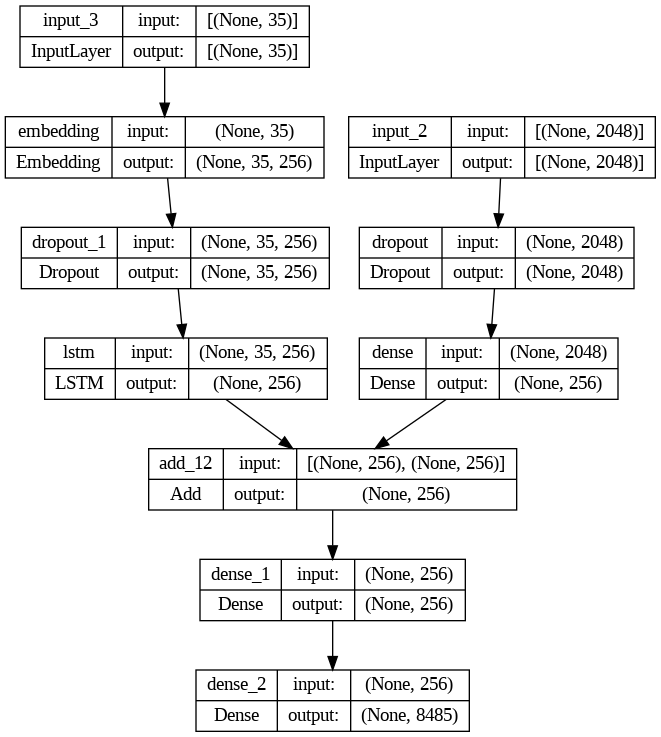

In [21]:
inputs1 = Input(shape=(2048,))    # Creating an input layer, each input has 2048 dimensions
fe1 = Dropout(0.4)(inputs1) # 40% of the inputs will be randomly set to 0 during training to reduce overfitting.
fe2 = Dense(256, activation='relu')(fe1) # This adds a fully connected dense layer with 256 units and ReLU activation function on top of the previous layer fe1.

# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)  # Utilizes Long Short-Term Memory (LSTM), with 256 memory cells/neurons applied on se2.

# decoder model
decoder1 = add([fe2, se3])  # Adds both fe2 and se3 layers element-wise together as part of decoder architecture.
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2) # The final output layer consists of a dense layer with vocab_size units
                                                            # (representing the number of classes or vocabulary size) and softmax activation function to obtain
                                                             # probability distribution over different classes/words.


model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# visualize the model
plot_model(model, show_shapes=True)

'''this code snippet provides an overview of building a neural network using Keras but does not include details about data preprocessing or
            training steps which may be required before fitting this model to actual data.'''

- shape=(2048,) : Denoting that it is a tuple with only one element, (2048) -> Size of dimensionality

- se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2) : It performs embedding on the second set of inputs using an embedding layer with vocab_size vocabulary size and 256-dimensional embeddings per word/token.The mask_zero parameter indicates whether or not to skip padding values (zeros).


# Training The Model

Now let's train our model

In [22]:
epochs = 25
batch_size = 32
# Calculate number of steps per epoch
steps = len(train) // batch_size   #  Back propagation and fetch the next data

for i in range(epochs):
    generator = Data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1) # verbose=1 -> controls whether progress updates are displayed during training.

'''This setup allows you to train your model on large datasets efficiently by processing smaller batches at once instead of loading all data into memory simultaneously.
                    - Loss function decreases gradually over the iterations,
                    - Increase the no. of epochs for better results,
                    - Assign the no. of epochs and batch size accordingly for quicker results'''

227/227 [==============================] - 69s 305ms/step - loss: 1.9921


- Epochs: An epoch represents one complete pass through the entire training dataset during training. Increasing the number of epochs allows the model to see more instances and potentially improve its performance. However, too many epochs can lead to overfitting if not regularized properly. It is common to start with a smaller number of epochs and gradually increase it until desired performance is achieved or early stopping criteria are met.You could try using 10-100 epochs depending on convergence behavior observed during training/validation phases.

- Batch Size: Batch size refers to how many samples are processed together before updating model weights during each iteration (or mini-batch) in an epoch.Smaller batch sizes allow for more frequent weight updates but may slow down training due to increased computational overhead. Larger batch sizes speed up training but may result in less accurate updates since they represent an average over multiple examples.Typical values range from 32 up to 256 or even higher based on available memory capacity.

- Finally There is no universally perfect value for these parameters as it heavily depends on your specific task and data characteristics. You will need to experiment with different values and monitor their impact on metrics like loss/error rate or validation accuracy to find what works best for your particular case.

Saving the model

In [23]:
model.save('/content/drive/MyDrive/flicker/'+'/model.h5')

# Generate Captions

Let's generate captions for images using (index_to_word) function that aims to convert an index back to its corresponding word based on the word-to-index mapping stored in the tokenizer.

In [24]:
def index_to_word(integer, tokenizer): # integer -> the index to be converted
                                       # tokenizer -> the object containing the word-to-index mapping
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

'''This function can be useful when working with natural language processing tasks or
text data where we want to map numerical indices back to their original words using a pre-built dictionary or tokenizer.
Convert the predicted index from the model into a word'''

In [25]:
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):  # this determines the maximum length of generated captions).
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0) # represents probabilities across different words in vocabulary.
        # get index with high probability
        yhat = np.argmax(yhat) # The index with highest probability (argmax) is selected as the predicted word index.
        # convert index to word
        word = index_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
    return in_text

'''Generates captions for images using a pre-trained model, tokenizer, and maximum sequence length using (predict_caption) function'''

# Validation

Validating the data using BLEU Score

The BLEU (Bilingual Evaluation Understudy) score is a metric commonly used to evaluate the quality of machine-generated translations or summaries by comparing them against one or more reference translations. It measures the similarity between an automatically generated translation and human-generated reference translations.

In [26]:
# validate with test data
actual, predicted = list(), list() # Score actual captions and predicted captions for each image in the test dataset
# This loop iterates over each image in the test dataset (represented by test) using the tqdm function to display a progress bar.
for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    # actual and predicted captions are split into individual words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0))) # unigram precision
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0))) # bigram precision

'''this code evaluates how well a caption generation model performs on test data by comparing its
generated captions to reference or ground truth captions using BLEU scores.'''

100%|██████████| 810/810 [09:23<00:00,  1.44it/s]


BLEU-1: 0.550635
BLEU-2: 0.327451


- A BLEU Score more than 0.4 is considered a good result, for a better score increase the number of epochs accordingly

# Visualization

In [27]:
def generate_caption(image_name):
    # load the image
    image_id = image_name.split('.')[0]
    img_path = os.path.join('/content/drive/MyDrive/flicker', "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('Actual caption : ')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('Predicted caption : ')
    print(y_pred)
    plt.imshow(image)

Actual Caption : 
startseq black dog and spotted dog are fighting endseq
startseq black dog and tri-colored dog playing with each other on the road endseq
startseq black dog and white dog with brown spots are staring at each other in the street endseq
startseq two dogs of different breeds looking at each other on the road endseq
startseq two dogs on pavement moving toward each other endseq
Predicted Caption : 
startseq two dogs one black and one black are playing with each other endseq


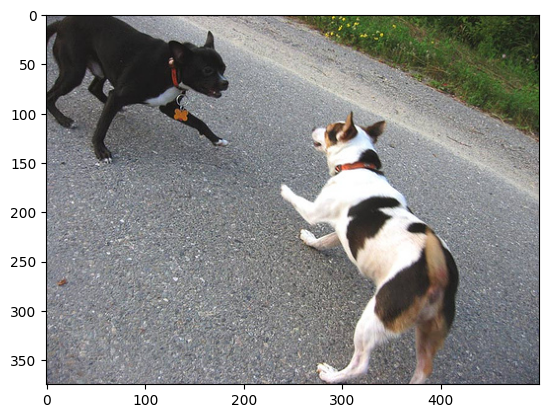

In [28]:
generate_caption("1001773457_577c3a7d70.jpg")

Actual Caption : 
startseq group of children run footrace in the snow endseq
startseq group of young boys race on snowy day endseq
startseq school kids racing in the snow endseq
startseq the children are running in the snow with fences in the background endseq
startseq the young runners are racing through the snow endseq
Predicted Caption : 
startseq boy in red coat and red pants is in the snow endseq


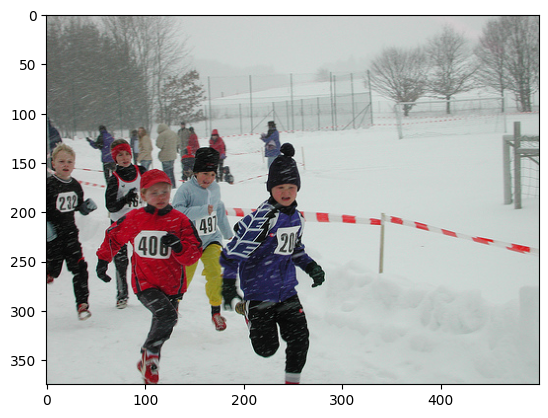

In [29]:
generate_caption("72218201_e0e9c7d65b.jpg")

Actual Caption : 
startseq grey bird stands majestically on beach while waves roll in endseq
startseq large bird stands in the water on the beach endseq
startseq tall bird is standing on the sand beside the ocean endseq
startseq water bird standing at the ocean 's edge endseq
startseq white crane stands tall as it looks out upon the ocean endseq
Predicted Caption : 
startseq seabird is flying over water endseq


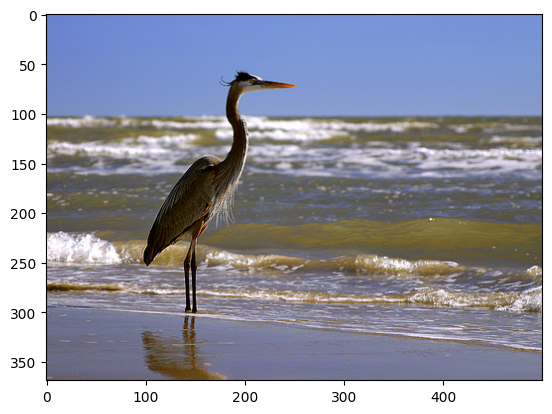

In [30]:
generate_caption('99679241_adc853a5c0.jpg')

Actual Caption : 
startseq boy wearing red shirt and jeans is doing flip on his bike endseq
startseq person flipping bicycle upside down endseq
startseq person flips on bike endseq
startseq person in red shirt doing tricks on bicycle endseq
startseq person is show upside down on his bicycle over large field endseq
Predicted Caption : 
startseq boy doing trick on bike endseq


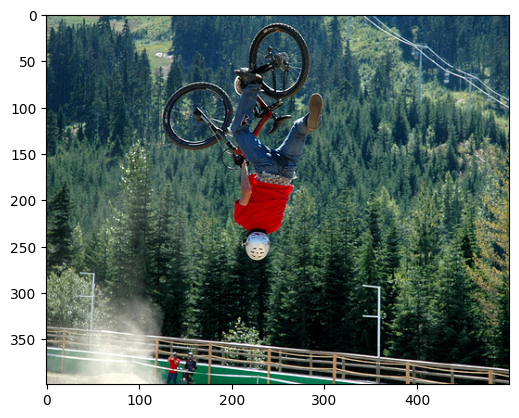

In [31]:
generate_caption("55135290_9bed5c4ca3.jpg")

Actual Caption : 
startseq brown dog is running through brown field endseq
startseq brown dog is running through the field endseq
startseq brown dog with collar runs in the dead grass with his tongue hanging out to the side endseq
startseq brown dog with his tongue wagging as he runs through field endseq
startseq dog running in the grass endseq
Predicted Caption : 
startseq two dogs playing in the grass endseq


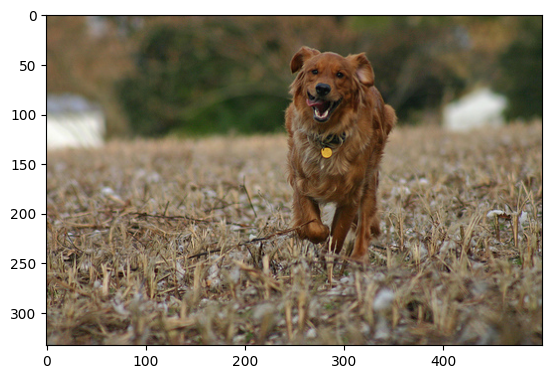

In [32]:
generate_caption('69189650_6687da7280.jpg')

Actual Caption : 
startseq man uses ice picks and crampons to scale ice endseq
startseq an ice climber in blue jacket and black pants is scaling frozen ice wall endseq
startseq an ice climber scaling frozen waterfall endseq
startseq person in blue and red ice climbing with two picks endseq
startseq climber climbing an ice wall endseq
Predicted Caption : 
startseq man in red jacket is skiing down snowy hill endseq


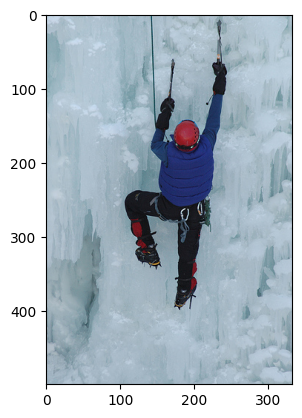

In [33]:
generate_caption("102455176_5f8ead62d5.jpg")

# Conclusion


This project aimed to develop a deep learning model capable of generating descriptive captions for images using the Flicker8k dataset. By leveraging convolutional neural networks (CNNs) for image feature extraction and recurrent neural networks (RNNs) with attention mechanisms for language generation, we have successfully built an image caption generator.Throughout the project, we preprocessed the Flicker8k dataset by extracting features from images using a pre-trained CNN model. These features were then used as inputs to an RNN-based architecture that learned to generate captions based on those visual representations.The model was trained on a large number of image-caption pairs and optimized using techniques like teacher forcing and beam search decoding. We carefully fine-tuned hyperparameters, experimented with different architectures, and conducted thorough evaluations to ensure accurate and meaningful caption generation.